# EDA_Notebook

In [2]:
%matplotlib inline
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [3]:
# absolute path till parent folder
abs_path = os.getcwd()
path_array = abs_path.split("/")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i   

In [5]:
# path to clean data
clean_data_path = homefolder_path + "/EDA_by_Python_smuch/Data_set/cleaned_autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [6]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [7]:
print("Sized of df (M*N): {0}".format(df.shape) )

Sized of df (M*N): (313687, 27)


# Distribution

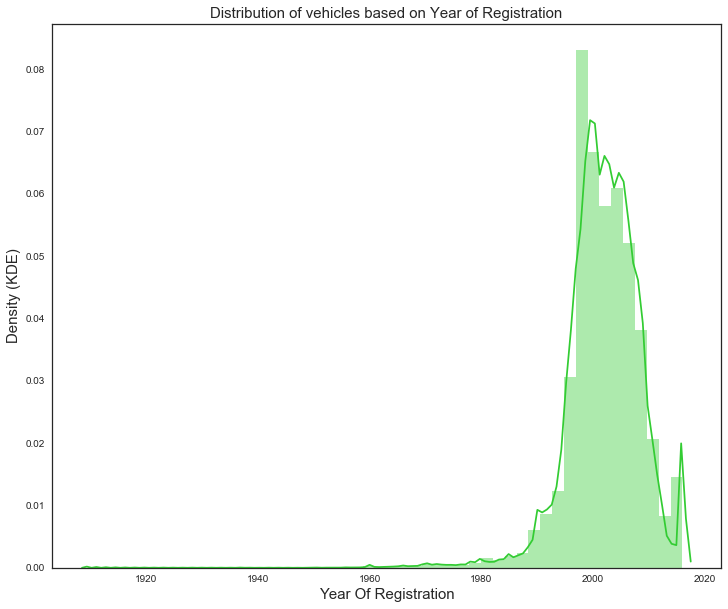

In [11]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(12,10))
sns.distplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
plt.show()

In [12]:
# saving the plot
fig.savefig(abs_path + "/Plots/vehicle-distribution.png")

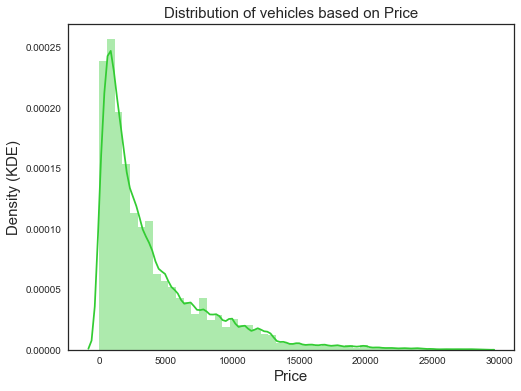

In [13]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["price"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribution of vehicles based on Price', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Price", fontsize= 15)
plt.show()

# Variation of the price range by the vehicle type

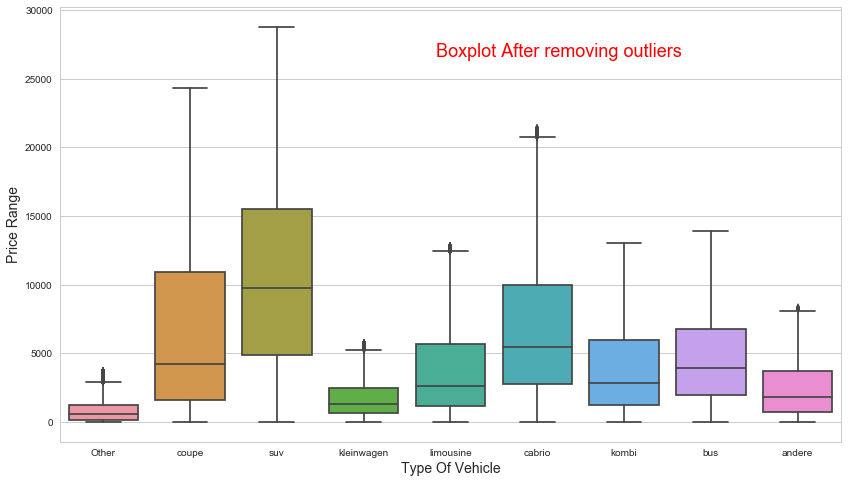

In [14]:
# Boxplot to see the distribution after outliers has been removed
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Boxplot After removing outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})
plt.show()

In [15]:
# saving the plot
fig.savefig(abs_path + "/Plots/price-vehicleType-boxplot.png")

# Total count of vehicles by type available on ebay for sale

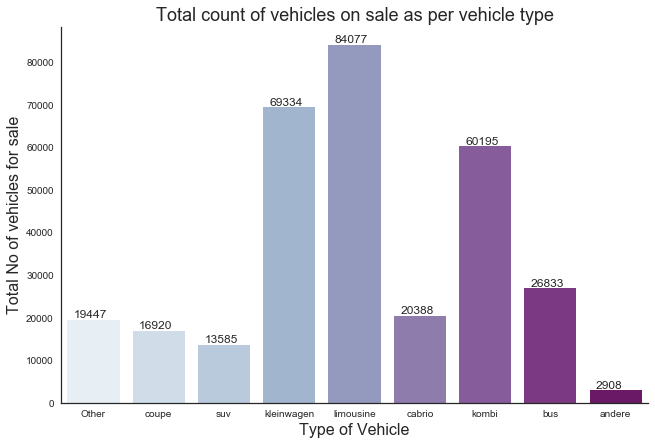

In [16]:
# Count plot to show the number of vehicles belonging to each vehicleType
sns.set_style("white")
g = sns.factorplot(x="vehicleType", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Type of Vehicle",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total No of vehicles for sale", fontdict= {'size':16})
g.ax.set_title("Total count of vehicles on sale as per vehicle type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [17]:
# saving the plot
g.savefig(abs_path + "/Plots/count-vehicleType.png")

# No of Vehicles by Brand Available on ebay for sale

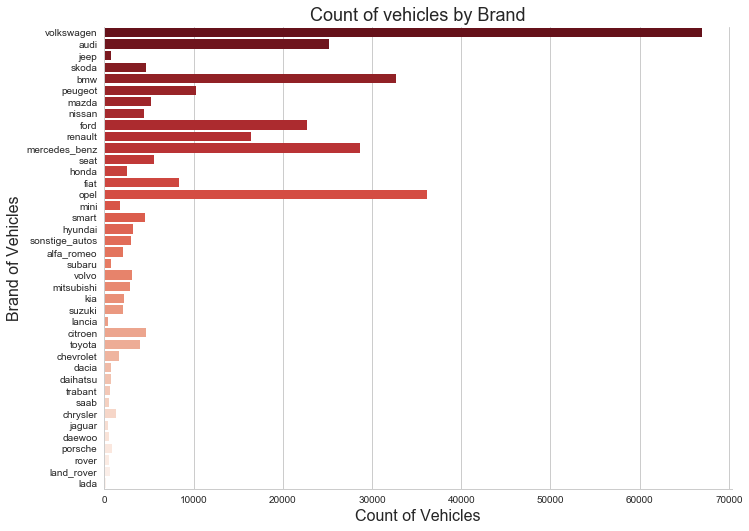

In [18]:
# Count plot to show the number of vehicles belonging to each brand
sns.set_style("whitegrid")
g = sns.factorplot(y="brand", data=df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Count of vehicles by Brand",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Vehicles",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Brand of Vehicles",fontdict= {'size':16})
plt.show()
# for p in g.ax.patches:
#      g.ax.annotate((p.get_width()), (p.get_width()-0.1, p.get_y()-0.1))

In [19]:
# saving the plot
g.savefig((abs_path + "/Plots/brand-vehicleCount.png"))

# Average price for vehicles based on the type of vehicle as well as on the type of gearbox

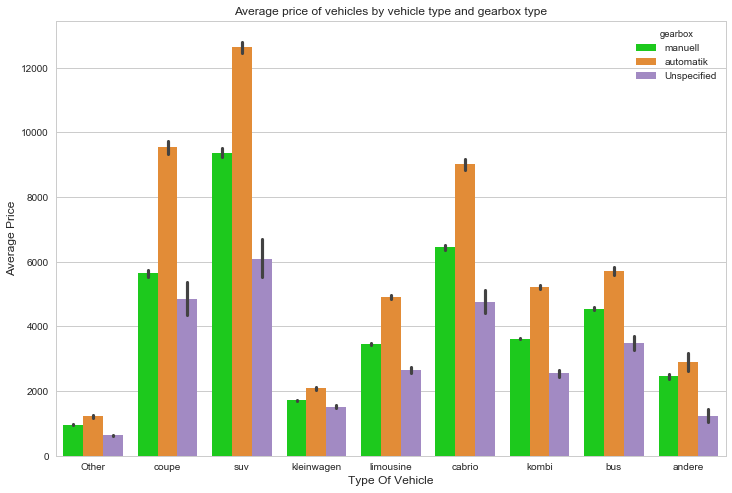

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Average price of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

In [23]:
# saving the plot
fig.savefig((abs_path + "/Plots/vehicletype-gearbox-price.png"))

# Average price of vehicle by fuel type and gearbox type

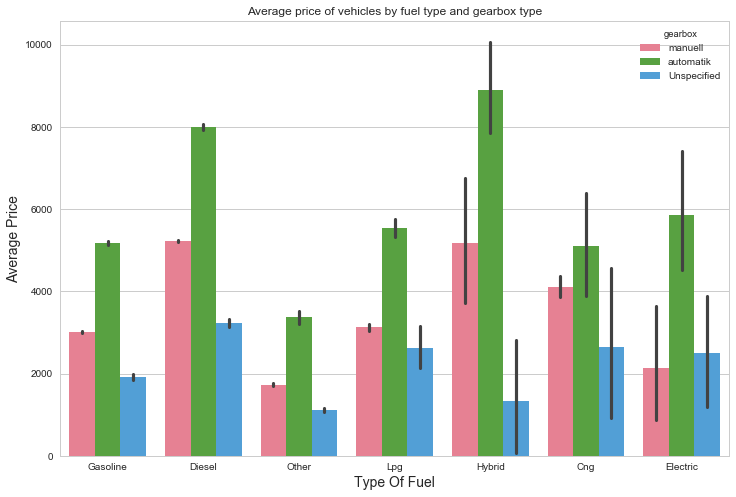

In [25]:
# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(12,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Average price of vehicles by fuel type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

In [26]:
# saving the plot
fig.savefig((abs_path + "/Plots/fueltype-vehicleType-price.png"))

# Average power of a vehicle by vehicle type and gearbox type 

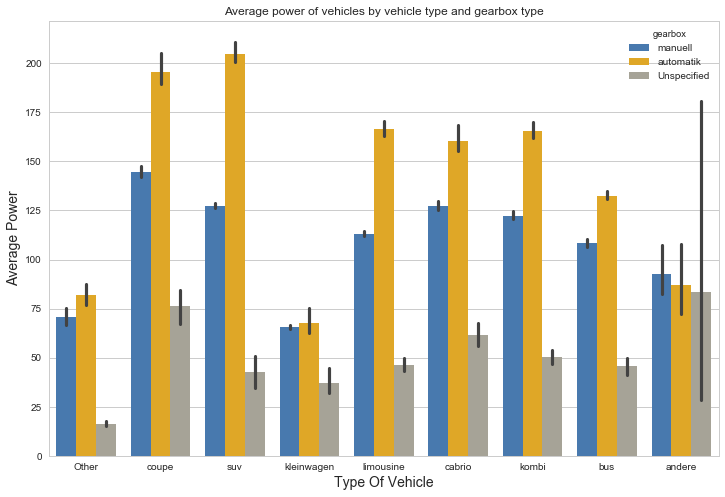

In [27]:
# barplot for price based on fuel type and gearbox type
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(12,8))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Average power of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Power",fontdict= {'size':14})
plt.show()

In [28]:
# saving the plot
fig.savefig((abs_path + "/Plots/vehicletype-fueltype-power.png"))

# Caculate Average price

In [29]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,avgPrice,brand,vehicleType
0,897,volkswagen,Other
1,8014,volkswagen,coupe
2,13946,volkswagen,suv
3,1626,volkswagen,kleinwagen
4,3743,volkswagen,limousine


# Average price of a vehicle by brand as well as vehicle type 

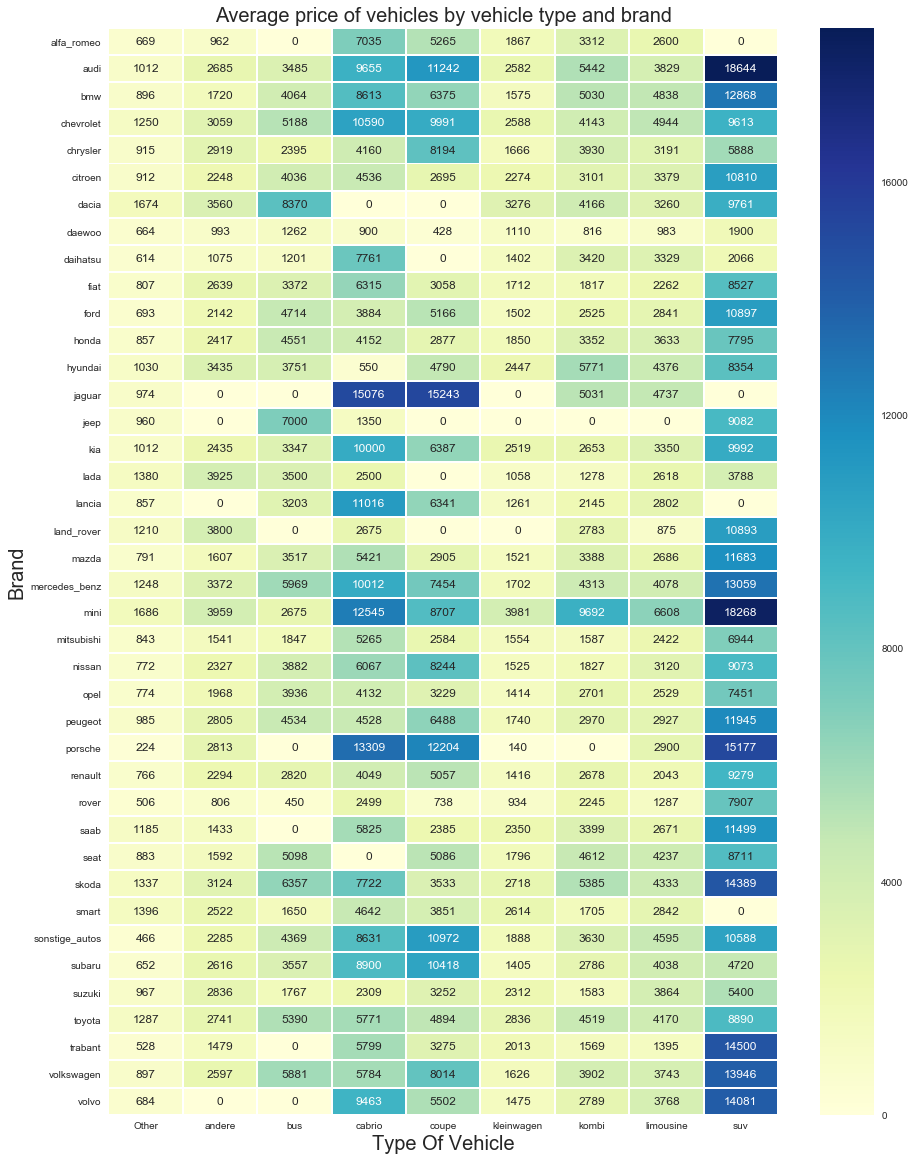

In [30]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [31]:
fig.savefig((abs_path + "/Plots/heatmap-price-brand-vehicleType.png"))

# Data controll

In [32]:
# concatinating files of the same brand 
search_term = str(sys.argv[1])
# search_term = "audi"
path = homefolder_path + "/CleanData/DataForAnalysis/" + search_term # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

NameError: name 'sys' is not defined

In [ ]:
frame.head(2)

In [ ]:
# colors = ["#47d147", "#ff8c1a","#a180cc"]
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.stripplot(x="vehicleType", y="NoOfDaysOnline", hue="gearbox", split=True, data=frame,size=8, alpha=0.5, jitter=True)
ax.set_title("No of days a add is online before the vehicles of brand " + search_term + " is sold")
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("No of days online",fontdict= {'size':14})
plt.show()

In [ ]:
fig.savefig((abs_path + "/Plots/vehicletype-NoOfDaysOnline.png"))